# Problem Definition

> To evaluate the performance of products based on stores, zone and products

Different Analysis that are going to be performed are

* Store Based Performance
> Product based analysis<br>
> MRP based analysis<br>
> Category based analysis<br>
> Size based analysis<br>
> Bottom wear analysis<br>
> Sales return analysis<br>

Similarly same analysis needs to be performed on the basis of
* Zone Based Performance
* Product Based Performance

### Knowing the Heads

**1. Catcode:** Category represents a group of products having similar specification. For Eg: RKCE means Retail Kurti Casual Embroidery. If we analyse category we can understand the type of designs that are having more demand in that particular store.<br>
**2. Barcode:** Barcode is unique code used to identification of each product.<br>
**3. Item Name:** Item Name is used to identify the product for operations team. For example flower pulse was fast moving product in retails and it is easy to identify the products by its name. Product name includes attributes such as - Product Type, Size for Kurti and Bottom Wear, Colour of Bottom Wear and design number. By splitting the datas we can understand the size pattern and colour that are fast moving.<br>
**4. Sales Qty:** Sales qty represents the total sales qty at each store.<br>
**5. Sales Value:** Sales Value represents the total sales value at each store.<br>
**6. Sales Ret Qty:** Sales return qty represents the total sales qty at each store.<br>
**7. Sales Ret Value:** Sales return value represents the total sales value at each store.<br>
**8. Net Qty:** Net qty represents the Net sales qty at each store.<br>
**9. Net Value:** Net Value represents the net sales value at each store. If we devide Net Value with Net Qty we shall arrive at MRP which can be used for analysis of MRP wise performance.<br>

In [1]:
# Importing the required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Preprocessing sklearn

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Models from scikit-learn

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

import warnings
warnings.filterwarnings("ignore")
plt.style.use("ggplot")

# Data Preprocessing

In [2]:
# Read the data

df = pd.read_excel("C:Analysis_data.xlsx")
df.head()

,Sno.,Catcode,Barcode,Item Name,Sales Qty,Sales Value,Sales Ret Qty,Sales Ret Value,Net Qty,Net Value,Store Name,City,State,Zone_state,Zone_Kerala
0,1,R8APRS,R8APRS18,PREMIUM PRIMEX-9-101(SAREE),1,1299,0,0,1,1299,AA Fashions,Gudivada,Andhra Pradesh,4.0,NaN
1,2,R8LIR,R8LIR2,LIORA-D-102-(SAREE),1,699,0,0,1,699,AA Fashions,Gudivada,Andhra Pradesh,4.0,NaN
2,3,RSCN,R8BFS3,BLUSH FLORA LS-A-103-(SAREE),1,699,0,0,1,699,AA Fashions,Gudivada,Andhra Pradesh,4.0,NaN
3,4,RSCN,R8BTY3,BETSY-103-(SAREE),1,899,0,0,1,899,AA Fashions,Gudivada,Andhra Pradesh,4.0,NaN
4,5,RSCN,R8HZL1,HAZEL-101-(SAREE),1,999,0,0,1,999,AA Fashions,Gudivada,Andhra Pradesh,4.0,NaN


In [3]:
# Checking the shape of dataframe
df.shape

(18108, 15)

In [4]:
# Checking different datatypes in the dataframe
df.dtypes

Sno.                 int64
Catcode             object
Barcode             object
Item Name           object
Sales Qty            int64
Sales Value          int64
Sales Ret Qty        int64
Sales Ret Value      int64
Net Qty              int64
Net Value            int64
Store Name          object
City                object
State               object
Zone_state         float64
Zone_Kerala        float64
dtype: object

## Product type, Category, Bottom wear Categorization

Different product names are found out from the dataset and extracted from the Item name column.<br>
The data is further categorized whether the apparel is a bottom wear or not.<br>

The different categories (Casual, ethnic & Signature) are classified based on the catcode. As mentioned in the given dataset thirld letter alone cannot be used to finalise the category. For example: Masks has a catcode of RMSK where S comes in third letter, but it cannot be in the signature category. Hence it is categorised based on the apparel type and price accordingly.

In [5]:
# Creating list of products to make different categories
product_name = ["Saree", 
                "Kurti", 
                "Suit", 
                "Leggings", 
                "Stole", 
                "Mask", 
                "Sare", 
                "Kurthi", 
                "Duppatta", 
                "Pant", 
                "bottom", 
                "Leggi", 
                "Leegings",
                "AL",
                "FL",
                "Palazzo",
                "CB"]

In [6]:
# Extracting the product type from Item Name
df["Product"] = df["Item Name"].str.extract('({})'.format('|'.join(product_name)), 
                        flags=re.IGNORECASE, expand=False).str.lower().fillna('Unknown')

In [7]:
# Replacing the same products with different spellings & codes
df["Product"] = df["Product"].replace(to_replace = ["sare", "kurthi", "leggi", "leegings", "al", "fl", "cb"], 
                                      value = ["saree", "kurti", "leggings", "leggings", "leggings", "leggings", "bottom"])

In [8]:
bottom_find = ["Bottom", "leggings", "Pant", "Palazzo"]

In [9]:
# Extracting bottomwear typ from item name
df["Bottomwear"] = df["Product"].str.extract('({})'.format('|'.join(bottom_find)), 
                        flags=re.IGNORECASE, expand=False).str.lower().fillna('No')

In [10]:
# Counting the no. of types of products
df.Product.value_counts()

kurti       6687
leggings    5301
suit        2894
saree       2048
bottom       505
stole        290
pant         156
mask          88
palazzo       59
Unknown       52
duppatta      28
Name: Product, dtype: int64

In [11]:
# Counting the number of products in Bottomwear category
df.Bottomwear.value_counts()

No          12087
leggings     5301
bottom        505
pant          156
palazzo        59
Name: Bottomwear, dtype: int64

In [12]:
# Checking the different categories to get an idea about casual, ethnic or signature type
dict(df.Catcode.value_counts())

{'RKCE': 4063,
 'RCEE': 1959,
 'RKEE': 1833,
 'CBFL': 1550,
 'RKCN': 1523,
 'CBAL': 808,
 'RKCP': 694,
 'RSEW': 662,
 'RCCE': 578,
 'RSEN': 565,
 'CBCB': 501,
 'RSCN': 460,
 'RCEH': 446,
 'RSEE': 385,
 'CKCE': 320,
 'RSTL': 257,
 'RCCN': 215,
 'CCEE': 180,
 'CBPP': 156,
 'RCEN': 111,
 'RMSK': 88,
 'RKEN': 85,
 'RBAL': 79,
 'RKCW': 60,
 '$HMG': 55,
 'RBFL': 52,
 'RCCP': 49,
 '$TNC': 49,
 'RDPT': 48,
 'RKCH': 31,
 '$$ELPZ': 30,
 '$$ELS': 27,
 'RSCE': 21,
 'RSCW': 20,
 'R8LIR': 19,
 'RKEH': 17,
 'RCEP': 17,
 'RSCP': 14,
 'CBFU': 14,
 '$THDPT': 12,
 'RSEH': 10,
 'RSSW': 6,
 'CBLB': 4,
 '$SFT': 4,
 'RKEP': 4,
 'R816MKRS': 4,
 '$VSS': 4,
 '$BTM': 2,
 'RSSE': 2,
 'R8FKC': 1,
 '$$SAF': 1,
 'R8APRS': 1,
 '$$ZSA': 1,
 '$$SITH': 1,
 '$$EML': 1,
 'RBPZ': 1,
 '$$SBT': 1,
 '$$TAL': 1,
 '$$PAL': 1,
 '$$THU': 1,
 '$CAL': 1,
 '$$THN': 1,
 'R87APRS': 1,
 '$$TIA': 1}

In [13]:
# Creating list of different categories
signature = ["RSSW", "R8FKC", "RSSE", ]
casual = ["R8APRS", "R8LIR", "RSCN", "RSCE", "RCCN", "RCCE", "RKCP", "RKCN", "RKCW", "RKCE", "CKCE", "RSTL", "RDPT", "RMSK",
          "RBAL", "CBAL", "CBFL", "CBCB", "$TNC", "RSCP", "RSCW", "RCCP", "CBPP", "$$ELPZ", "CBFU", "R816MKRS", "RKCH",
          "RBFL", "RBPZ", "$VSS", "$$PAL", "$CAL", "$$SAF", "$$EML", "$BTM", "CBLB", "$$THU", "$$TAL", "$$SITH", "R87APRS",
          "$$TIA", "$$THN", "$$ZSA", "$$SBT"]
ethnic = ["RSEN", "RSEW", "RSEE", "RSEH", "RCEN", "RCEE", "RCEH", "RKEE", "RKEH", "CCEE", "$THDPT", "$HMG", "RKEN", "RCEP",
          "$$ELS", "RKEP", "$SFT", ]

In [14]:
# Categorising different categories using lambda function
def cat_finder(a):
    for i in signature:
        if i in a:
            return "Signature"
    for i in casual:
        if i in a:
            return "Casual"
    for i in ethnic:
        if i in a:
            return "Ethnic"
        
df["Category"] = df.Catcode.apply(lambda x: cat_finder(x))

In [15]:
# Checking the count of different categories
df.Category.value_counts()

Casual       11727
Ethnic        6372
Signature        9
Name: Category, dtype: int64

In [16]:
# Check for missing values
df.Category.isnull().sum()

0

## Size categorization

The size portion of Kurtis come in the third part of the item name. The third part after hyphen is extracted and then the size is obtained from that.

In [17]:
# Creating a seperate dataframe for kurti size analysis
df_kurti = df[df["Product"] == "kurti"]

In [18]:
# Extracting the Kurti size part from Item Name
df_kurti["Size"] = df["Item Name"].str.split("-", expand = True)[2]
size_find = ["XS", "S", "M", "L", "XL", "XXL"]
df_kurti["Size"] = df_kurti["Size"].str.extract('({})'.format('|'.join(size_find)), 
                        flags=re.IGNORECASE, expand=False).str.lower().fillna('Unknown')
df_kurti.head()

,Sno.,Catcode,Barcode,Item Name,Sales Qty,Sales Value,Sales Ret Qty,Sales Ret Value,Net Qty,Net Value,Store Name,City,State,Zone_state,Zone_Kerala,Product,Bottomwear,Category,Size
68,69,RKCP,$$HNE10,HIDDEN ESSENCE -102-XL(KURTI),1,899,0,0,1,899,AA Fashions,Gudivada,Andhra Pradesh,4.0,NaN,kurti,No,Casual,xl
69,70,RKCP,$$HNE11,HIDDEN ESSENCE -101-XXL(KURTI),1,899,0,0,1,899,AA Fashions,Gudivada,Andhra Pradesh,4.0,NaN,kurti,No,Casual,xxl
70,71,RKCP,$$HNE2,HIDDEN ESSENCE -102-XS(KURTI),1,899,0,0,1,899,AA Fashions,Gudivada,Andhra Pradesh,4.0,NaN,kurti,No,Casual,xs
71,72,RKCP,$$HNE3,HIDDEN ESSENCE -101-S(KURTI),2,1798,0,0,2,1798,AA Fashions,Gudivada,Andhra Pradesh,4.0,NaN,kurti,No,Casual,s
72,73,RKCP,$$HNE5,HIDDEN ESSENCE -101-M(KURTI),1,899,0,0,1,899,AA Fashions,Gudivada,Andhra Pradesh,4.0,NaN,kurti,No,Casual,m


## Sales Return Ratio Calculation

In [19]:
# Creating a list of unique store names
store_list = list(df["Store Name"].unique())

In [20]:
# Finding the total return of a particular store using lambda function
def sales_ret_calc(a):
    for i in store_list:
        if i in a:
            df_temp = df[df["Store Name"] == i]
            return df_temp["Sales Ret Value"].sum()
df["Total_Ret_ratio"] = df["Store Name"].apply(lambda x: sales_ret_calc(x))        

In [21]:
# Calculating the Total Return Ratio
df.Total_Ret_ratio = df.Total_Ret_ratio/df.Total_Ret_ratio.max()

## Total Net Sale Calculation

In [22]:
# calculating the total sale done by each retail store
def total_sale_calc(a):
    for i in store_list:
        if i in a:
            df_temp = df[df["Store Name"] == i]
            return df_temp["Net Value"].sum()
df["Total_Sale"] = df["Store Name"].apply(lambda x: total_sale_calc(x))  

## MRP Categorization

For MRP based analysis it is better to categorise MRP in different ranges. Different ranges are:

* 0-500
* 500-1000
* 1000-1500
* 1500-2500
* 2500-4000
* 4000-7000

In [23]:
# Create MRP Categories
mrp_bins = [0, 500, 1000, 1500, 2500, 4000, 7000]
mrp_labels = ["0-500", "500-1000", "1000-1500", "1500-2500", "2500-4000", "4000-7000"]
df["mrp group"] = pd.cut(df["Sales Value"], bins = mrp_bins, labels = mrp_labels, include_lowest = True)

In [24]:
# Checking the values
df["mrp group"].value_counts()

500-1000     6195
1000-1500    6002
0-500        2886
1500-2500    2336
2500-4000     644
4000-7000      44
Name: mrp group, dtype: int64

## STORE BASED PERFORMANCE

A fucntion is created called store_stat() which takes the store name as input and returns the following stats of the store

**Product Based Analysis:** This gives the details about the sale of the products happening in the store. This gives an idea of what products to be kept in the store.<br>

**MRP Based Analysis:** This gives the details about the products that are sold which fall undr different MRP ranges. This helps to decide which MRP ranges of products to be stocked in the store.<br>

**Category Based Analysis:** This shows the sale happening in the three categories. ie, Casual, Ethnic and Signature range of apparels

**Size Based Analysis:** This shows the sale of different sizes of products. This helps to get idea about the sale of products according to sizes.

**Bottom Wear Analysis:** This gives the details about sale of products in the bottomwear category, ie, Bottom, leggings, Pant etc.

**Sales return Analysis:** This gives the idea of store having highest/lowest return ratio

In [25]:
# List of different store names
list(df["Store Name"].unique())

['AA Fashions',
 'Aim And Dream Enterprises (A AND D Enterprises)',
 'Akshara Creations',
 'Alankrutha',
 'AMP Mini Mall',
 'BS Traders',
 'BSS Enterprises',
 'Camilia Beauty Care',
 'Charis Grace And Beauty',
 'Dress Up Trends (Palanadu Central)',
 'Eternal Elegant',
 'Fashion 4 U',
 'Karthika Tex',
 'Krishna Leela Enterprises',
 'Liya Fashions',
 'Lucky Fashions (Thiruvannamalai)',
 'M/S Sree Lakshmi Garments',
 'Madapparambil Trade Links',
 'Mars Fashions',
 'Mazhavil Collections',
 'Medley - Vismay Exclusive Edappal',
 'Medley Vismay Exclusive',
 'Miss India Boutique',
 'Neem Fashions',
 'Nest 4 U Property Management Saervices',
 'New Hello Happy Shoppe',
 'Outlook - Nagercoil',
 'Rajees-Vismay Retail',
 'Sanjeevi Garments New',
 'Siri Enterprises',
 'Sree Vishnum Fashions',
 'Vaari Traders Vismay Exclusive',
 'Vintage Retail',
 'Vismay Exclusive Aluva',
 'Vismay Exclusive Calicut',
 'Vismay Exclusive Capitol Mall',
 'Vismay Exclusive HSR Layout',
 'Vismay Exclusive Kottakkal',
 'V

In [26]:
def store_stat(store_name):
    """
    Takes name of a store as input and give the sale stats of the particular store
    """
    
    df_store = df[df["Store Name"] == store_name]
    df_kurti_store = df_kurti[df_kurti["Store Name"] == store_name]
    
    
    # Printing the stats
    print("Total Sale in {} = {}".format(store_name, df_store["Sales Value"].sum()))
    print("Total Return Value in {} = {}".format(store_name, df_store["Sales Ret Value"].sum()))
    print("Total Net Sale in {} = {}".format(store_name, df_store["Net Value"].sum()))
    print("\n\nThe Total Return Ratio in {} = {r:1.3f}".format(store_name, r = df_store["Total_Ret_ratio"].max()))
    
    # Plotting the required data
    
    # Product Based Analysis
    fig, ax = plt.subplots(figsize = (15,6))
    sns.countplot(df_store.Product, order = df_store.Product.value_counts().index)
    plt.title(f"PRODUCT BASED ANALYSIS OF {store_name.upper()}", fontsize = 20, fontweight = "bold")
    plt.xlabel("PRODUCT")
    plt.ylabel("COUNT")
    
    # MRP Based Analysis
    fig1, ax1 = plt.subplots(figsize = (15, 6))
    sns.countplot(df_store["mrp group"], order = df["mrp group"].value_counts().index)
    plt.title(f"MRP BASED ANALYSIS OF {store_name.upper()}", fontsize = 20, fontweight = "bold")
    plt.xlabel("MRP RANGE")
    plt.ylabel("COUNT")
    
    # Category Based Analysis
    fig2, ax2 = plt.subplots(figsize = (10, 10))
    plt.pie(df_store.Category.value_counts(), labels = df_store.Category.unique(), autopct = "%.2f%%", startangle = 90)
    plt.title(f"CATEGORY BASED ANALYSIS {store_name.upper()}", fontsize = 20, fontweight = "bold")
    
    # Size Based Analysis
    fig3, ax3 = plt.subplots(figsize = (10, 10))
    plt.pie(df_kurti_store.Size.value_counts(), labels = df_kurti_store.Size.unique(), 
            autopct = "%.2f%%", wedgeprops = dict(width = 0.5), startangle = 90)
    plt.title(f"SALE BASED ANALYSIS OF {store_name.upper()}", fontsize = 20, fontweight = "bold")
    
    # Bottom Wear Analysis
    
    fig4, ax4 = plt.subplots(figsize = (15,6))
    sns.countplot(df_store["Bottomwear"], order = df["Bottomwear"].value_counts().index)
    plt.title(f"BOTTOMWEAR ANALYSIS OF {store_name.upper()}", fontsize = 20, fontweight = "bold")
    plt.xlabel("BOTTOMWEAR")
    plt.ylabel("COUNT")

Total Sale in Vismay Exclusive Store (MG Road) EKM = 1368024
Total Return Value in Vismay Exclusive Store (MG Road) EKM = 52650
Total Net Sale in Vismay Exclusive Store (MG Road) EKM = 1315374


The Total Return Ratio in Vismay Exclusive Store (MG Road) EKM = 0.607


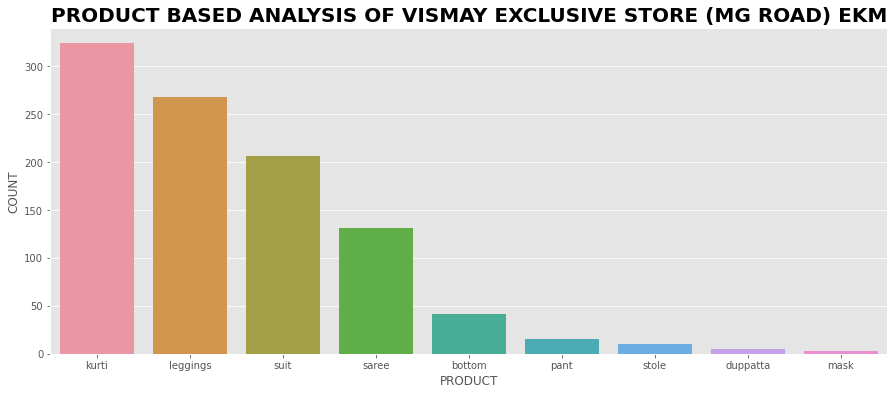

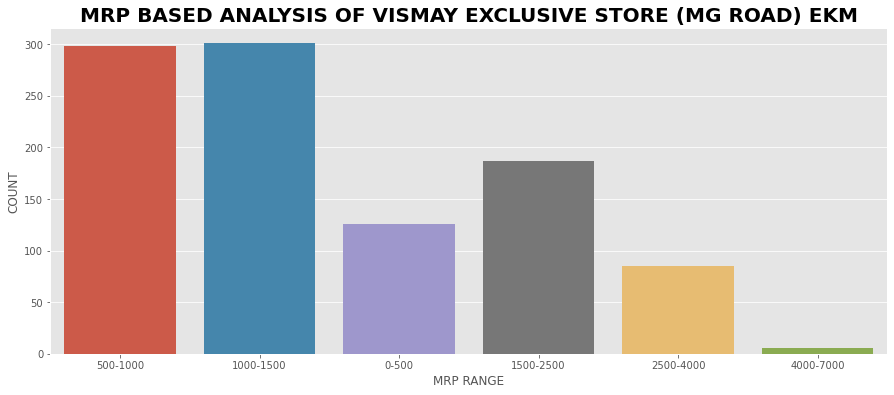

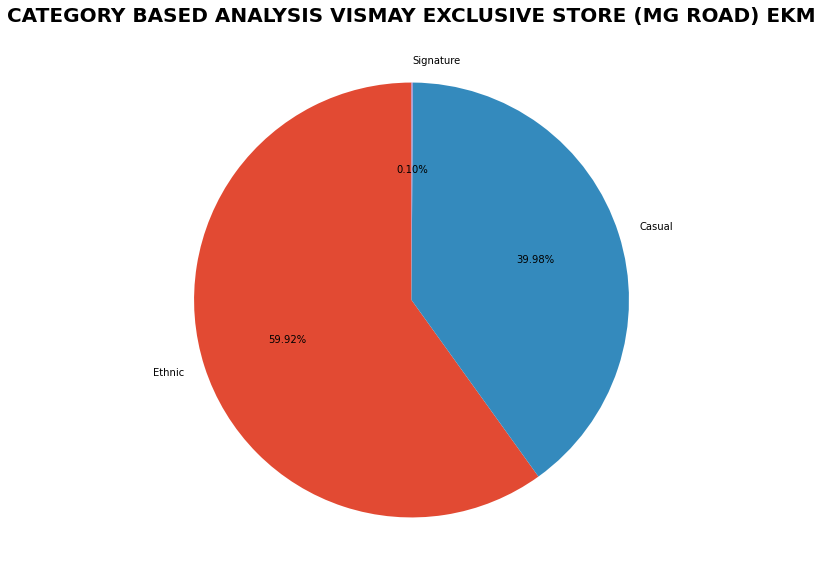

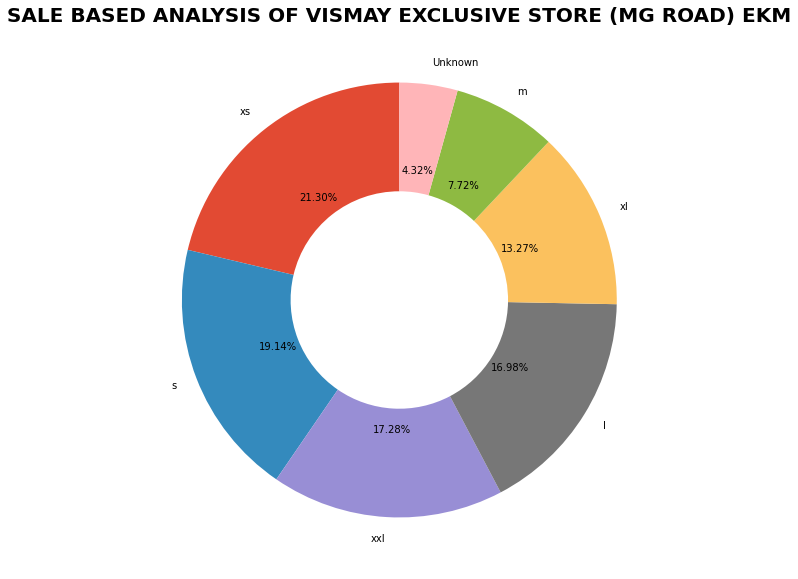

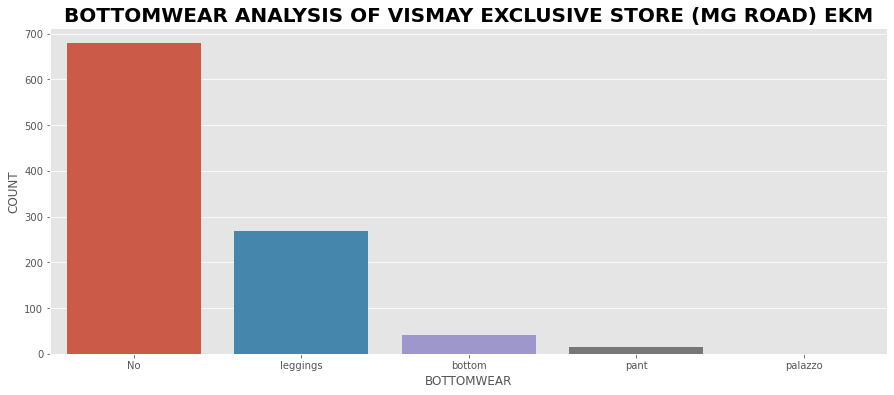

In [27]:
# Plotting the store based results of AA Fashions
store_stat("Vismay Exclusive Store (MG Road) EKM")

# ZONE BASED ANALYSIS

For the purpose of analysis, the retail outlets are categorised into different zones as below:

**Statewise Zone**

***Zone1 : Kerala***<br>
***Zone2 : Tamil Nadu***<br>
***Zone3 : Karnataka***<br>
***Zone4 : Andhra Pradhesh***<br>

As majority of the retail outlets are in Kerala an additional category is created for Kerala as below:

***Zone1 : Trivandrum, Kollam, Pathanamthitta, Alapuzha, Kottayam***<br>
***Zone2 : Idukki, Ernakulam, Thrissur, Palakkad***<br>
***Zone3 : Malappuram, Calicut, Wayanad, Kannur, Kasargod***<br>

Separate functions are created for Statewise and Kerala state study for different sales data

**Note**- ***The Zone data is not fully accurate because it was not able to find the location of some stores with the name of the store provided in the dataset. The name did not match with the retail outlet list in Vismay website and there were no proper google results as well***

## STATEWISE ZONE BASED ANALYSIS

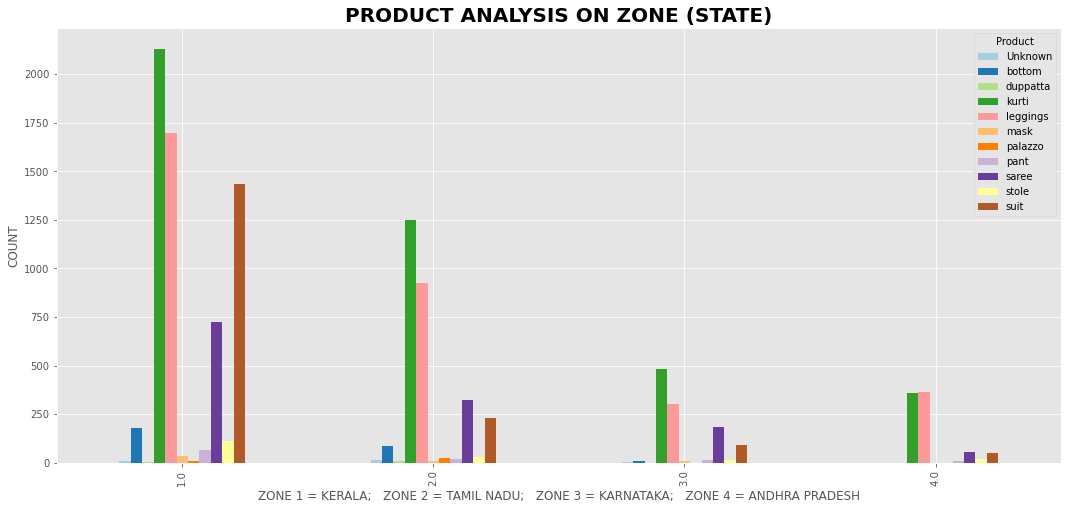

In [28]:
# Product Analysis On Zones
pd.crosstab(df["Zone_state"], df["Product"]).plot(kind = "bar",
                                                  figsize = (18,8),
                                                  cmap = "Paired")
plt.title("PRODUCT ANALYSIS ON ZONE (STATE)", fontsize = 20, fontweight = "bold")
plt.xlabel("ZONE 1 = KERALA;   ZONE 2 = TAMIL NADU;   ZONE 3 = KARNATAKA;   ZONE 4 = ANDHRA PRADESH")
plt.ylabel("COUNT");

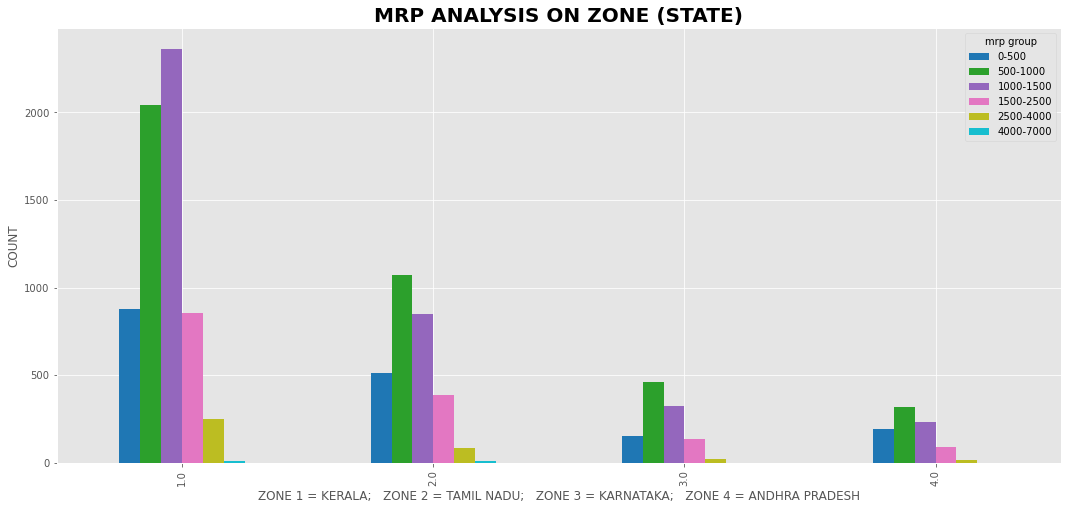

In [29]:
# MRP Analysis on Zones
pd.crosstab(df["Zone_state"], df["mrp group"]).plot(kind = "bar",
                                                    figsize = (18,8),
                                                    cmap = "tab10")
plt.title("MRP ANALYSIS ON ZONE (STATE)", fontsize = 20, fontweight = "bold")
plt.xlabel("ZONE 1 = KERALA;   ZONE 2 = TAMIL NADU;   ZONE 3 = KARNATAKA;   ZONE 4 = ANDHRA PRADESH")
plt.ylabel("COUNT");

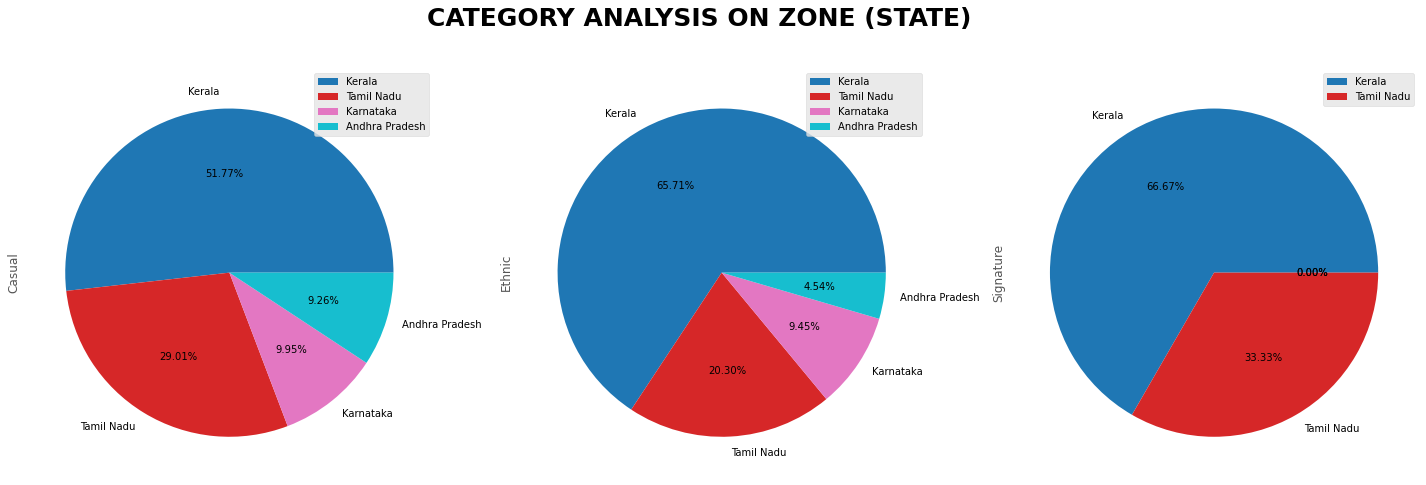

In [30]:
# Category Analysis of Zones
pd.crosstab(df["Zone_state"], df["Category"]).plot(kind = "pie",
                                                   cmap = "tab10",
                                                   figsize = (25,25),
                                                   subplots = True,
                                                   autopct = "%.2f%%",
                                                   labels = ["Kerala", "Tamil Nadu", "Karnataka", "Andhra Pradesh"]);
plt.suptitle("CATEGORY ANALYSIS ON ZONE (STATE)", fontsize = 25, fontweight = "bold", y = 0.65);

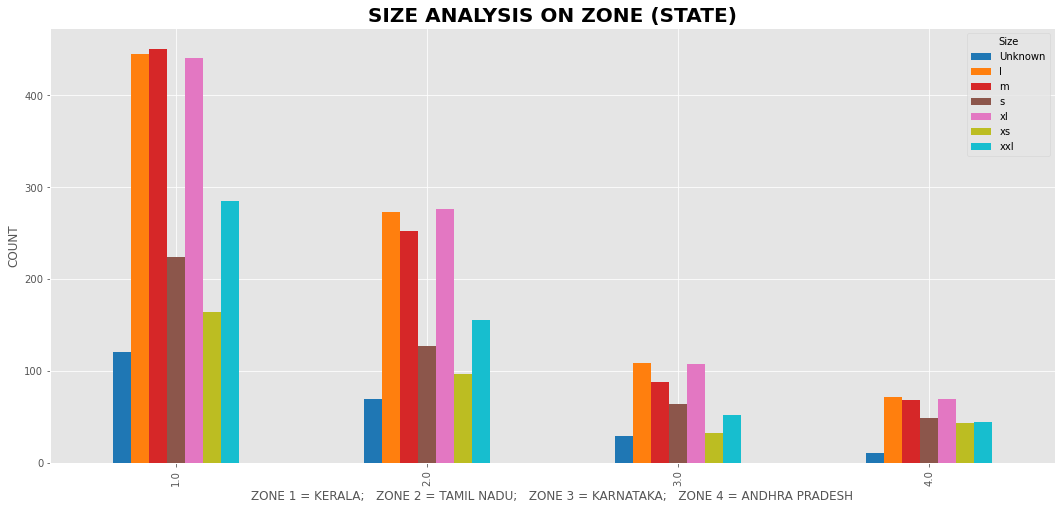

In [31]:
# Size Analysis of Zones
pd.crosstab(df_kurti["Zone_state"], df_kurti["Size"]).plot(kind = "bar",
                                                   cmap = "tab10",
                                                   figsize = (18,8));
plt.title("SIZE ANALYSIS ON ZONE (STATE)", fontsize = 20, fontweight = "bold")
plt.xlabel("ZONE 1 = KERALA;   ZONE 2 = TAMIL NADU;   ZONE 3 = KARNATAKA;   ZONE 4 = ANDHRA PRADESH")
plt.ylabel("COUNT");

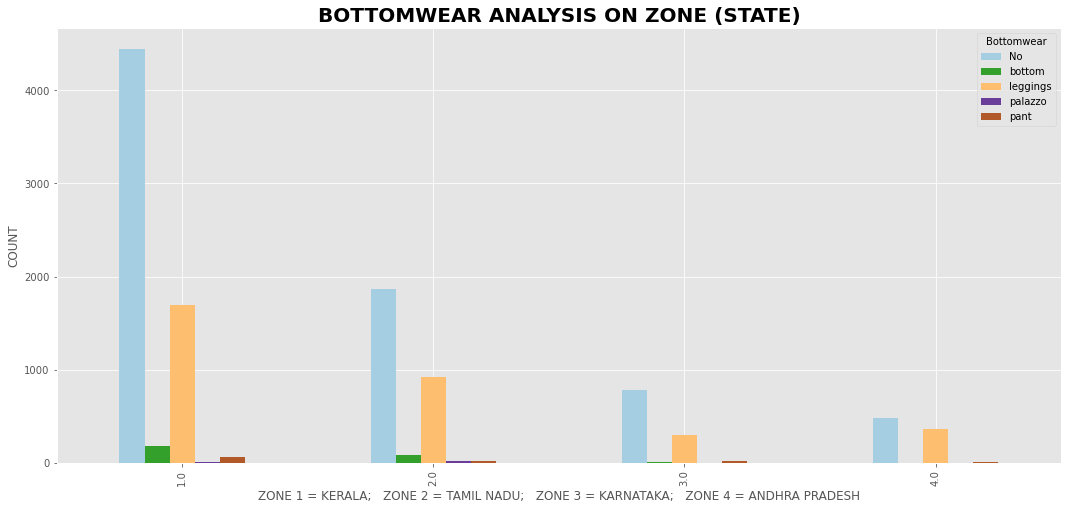

In [32]:
# Bottomwear Analysis on Zones
pd.crosstab(df["Zone_state"], df["Bottomwear"]).plot(kind = "bar",
                                                    figsize = (18,8),
                                                    cmap = "Paired")
plt.title("BOTTOMWEAR ANALYSIS ON ZONE (STATE)", fontsize = 20, fontweight = "bold")
plt.xlabel("ZONE 1 = KERALA;   ZONE 2 = TAMIL NADU;   ZONE 3 = KARNATAKA;   ZONE 4 = ANDHRA PRADESH")
plt.ylabel("COUNT");

## KERALA ZONE BASED ANALYSIS

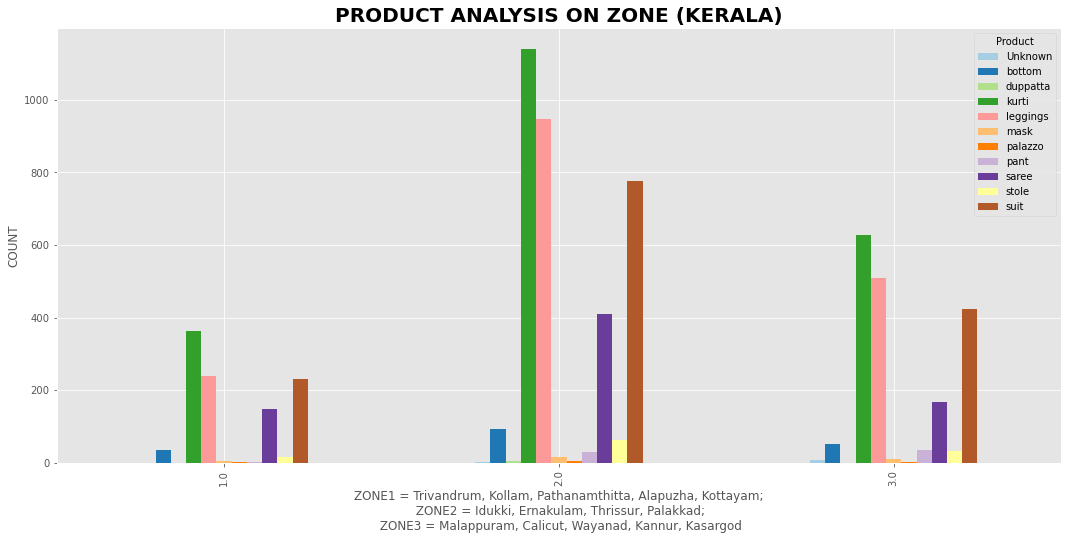

In [33]:
# Product Analysis of Zones in Kerala
pd.crosstab(df["Zone_Kerala"], df["Product"]).plot(kind = "bar",
                                                  figsize = (18,8),
                                                  cmap = "Paired")
plt.title("PRODUCT ANALYSIS ON ZONE (KERALA)", fontsize = 20, fontweight = "bold")
plt.xlabel("ZONE1 = Trivandrum, Kollam, Pathanamthitta, Alapuzha, Kottayam;\n ZONE2 = Idukki, Ernakulam, Thrissur, Palakkad;\n ZONE3 = Malappuram, Calicut, Wayanad, Kannur, Kasargod")
plt.ylabel("COUNT");

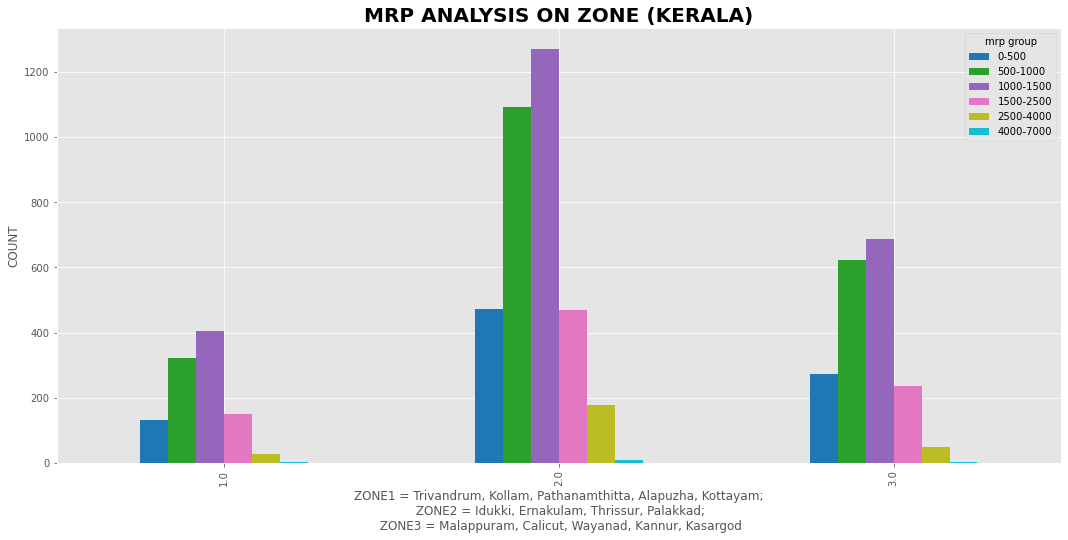

In [34]:
# MRP Analysis on Zones in Kerala
pd.crosstab(df["Zone_Kerala"], df["mrp group"]).plot(kind = "bar",
                                                    figsize = (18,8),
                                                    cmap = "tab10")
plt.title("MRP ANALYSIS ON ZONE (KERALA)", fontsize = 20, fontweight = "bold")
plt.xlabel("ZONE1 = Trivandrum, Kollam, Pathanamthitta, Alapuzha, Kottayam;\n ZONE2 = Idukki, Ernakulam, Thrissur, Palakkad;\n ZONE3 = Malappuram, Calicut, Wayanad, Kannur, Kasargod")
plt.ylabel("COUNT");

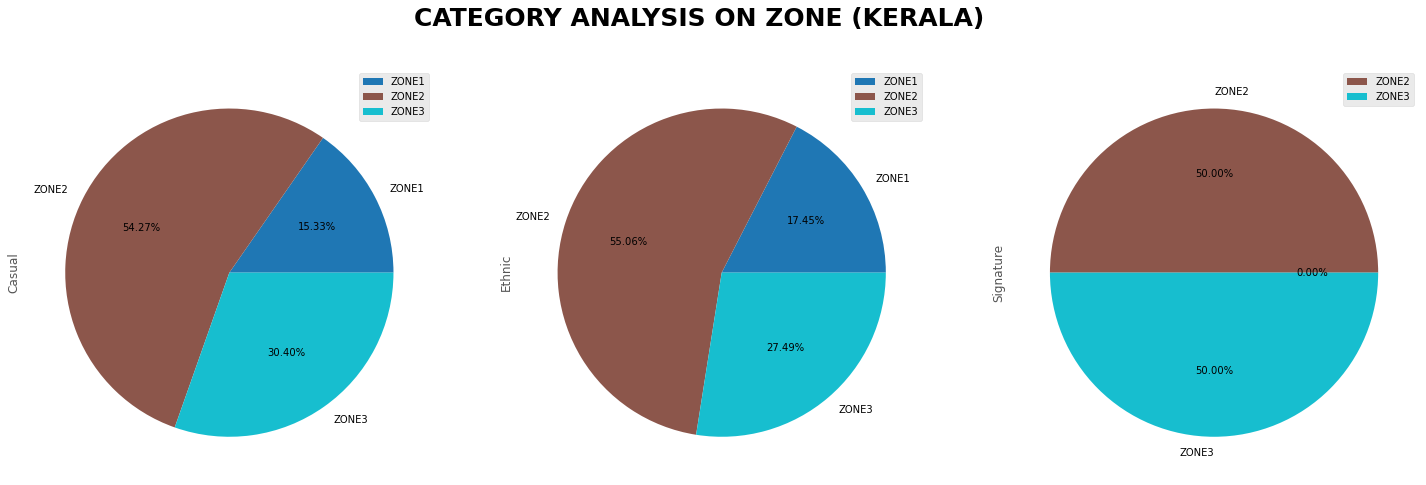

In [35]:
# Category Analysis of Zones IN KERALA
pd.crosstab(df["Zone_Kerala"], df["Category"]).plot(kind = "pie",
                                                   cmap = "tab10",
                                                   figsize = (25,25),
                                                   subplots = True,
                                                   autopct = "%.2f%%",
                                                   labels = ["ZONE1", "ZONE2", "ZONE3"]);
plt.suptitle("CATEGORY ANALYSIS ON ZONE (KERALA)", fontsize = 25, fontweight = "bold", y = 0.65);

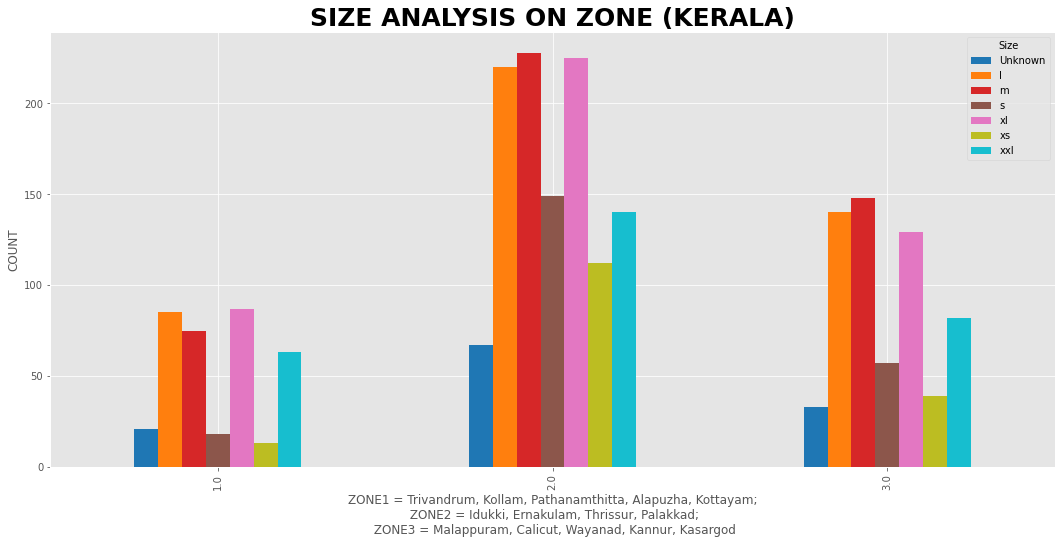

In [36]:
# Size Analysis of Zones in Kerala
pd.crosstab(df_kurti["Zone_Kerala"], df_kurti["Size"]).plot(kind = "bar",
                                                   cmap = "tab10",
                                                   figsize = (18,8));
plt.title("SIZE ANALYSIS ON ZONE (KERALA)", fontsize = 25, fontweight = "bold")
plt.xlabel("ZONE1 = Trivandrum, Kollam, Pathanamthitta, Alapuzha, Kottayam;\n ZONE2 = Idukki, Ernakulam, Thrissur, Palakkad;\n ZONE3 = Malappuram, Calicut, Wayanad, Kannur, Kasargod")
plt.ylabel("COUNT");

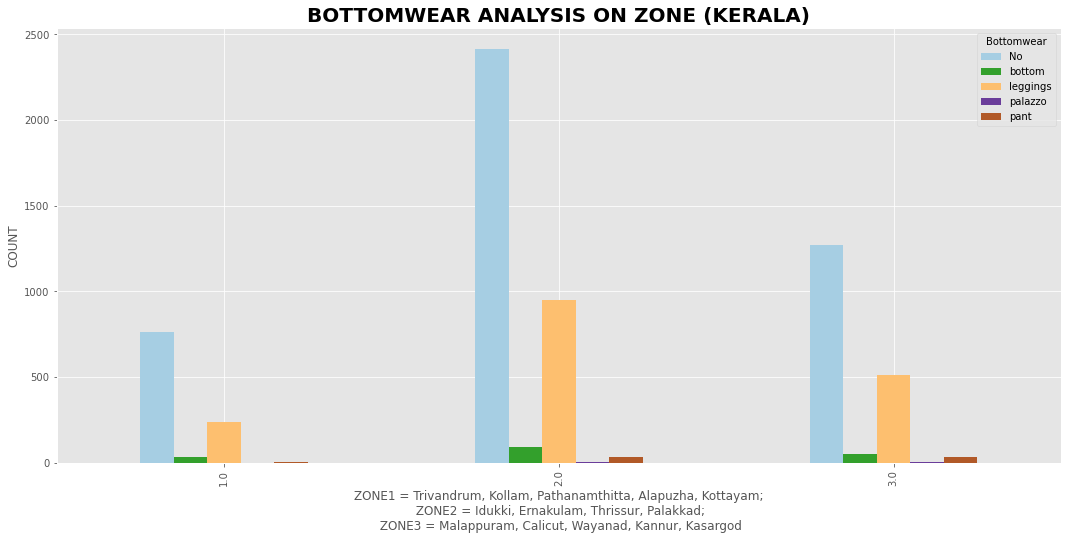

In [37]:
# Bottomwear Analysis on Zones in Kerala
pd.crosstab(df["Zone_Kerala"], df["Bottomwear"]).plot(kind = "bar",
                                                    figsize = (18,8),
                                                    cmap = "Paired")
plt.title("BOTTOMWEAR ANALYSIS ON ZONE (KERALA)", fontsize = 20, fontweight = "bold")
plt.xlabel("ZONE1 = Trivandrum, Kollam, Pathanamthitta, Alapuzha, Kottayam;\n ZONE2 = Idukki, Ernakulam, Thrissur, Palakkad;\n ZONE3 = Malappuram, Calicut, Wayanad, Kannur, Kasargod")
plt.ylabel("COUNT");

In [38]:
def state_wise_stat(zone):
    """
    Takes the code of a state zone as input and returns the sales data and plots of the zones
    """
    
    df_state = df[df["Zone_state"] == zone]
    df_kurti_state = df_kurti[df_kurti["Zone_state"] == zone]
    
    
    # Printing the stats
    print("Total Sale in Zone {} = {}".format(zone, df_state["Sales Value"].sum()))
    print("Total Return Value in Zone {} = {}".format(zone, df_state["Sales Ret Value"].sum()))
    print("Total Net Sale in Zone {} = {}".format(zone, df_state["Net Value"].sum()))
    
    # Plotting the required data
    
    # Product Based Analysis
    fig, ax = plt.subplots(figsize = (15,6))
    sns.countplot(df_state.Product, order = df_state.Product.value_counts().index)
    plt.title(f"PRODUCT BASED ANALYSIS OF ZONE {zone}", fontsize = 20, fontweight = "bold")
    plt.xlabel("PRODUCT")
    plt.ylabel("COUNT")
    
    # MRP Based Analysis
    fig1, ax1 = plt.subplots(figsize = (15, 6))
    sns.countplot(df_state["mrp group"], order = df_state["mrp group"].value_counts().index)
    plt.title(f"MRP BASED ANALYSIS OF ZONE {zone}", fontsize = 20, fontweight = "bold")
    plt.xlabel("MRP RANGE")
    plt.ylabel("COUNT")
    
    # Category Based Analysis
    fig2, ax2 = plt.subplots(figsize = (10, 10))
    plt.pie(df_state.Category.value_counts(), labels = df_state.Category.unique(), autopct = "%.2f%%", startangle = 90)
    plt.title(f"CATEGORY BASED ANALYSIS OF ZONE {zone}", fontsize = 20, fontweight = "bold")
    
    # Size Based Analysis
    fig3, ax3 = plt.subplots(figsize = (10, 10))
    plt.pie(df_kurti_state.Size.value_counts(), labels = df_kurti_state.Size.unique(), 
            autopct = "%.2f%%", wedgeprops = dict(width = 0.5), startangle = 90)
    plt.title(f"SIZE BASED ANALYSIS OF ZONE {zone}", fontsize = 20, fontweight = "bold")
    
    # Bottom Wear Analysis
    
    fig4, ax4 = plt.subplots(figsize = (15,6))
    sns.countplot(df_state["Bottomwear"], order = df_state["Bottomwear"].value_counts().index)
    plt.title(f"BOTTOMWEAR ANALYSIS OF ZONE {zone}", fontsize = 20, fontweight = "bold")
    plt.xlabel("BOTTOMWEAR")
    plt.ylabel("COUNT")

In [39]:
def kerala_stat(zone_kerala):
    """
    Takes the code of kerala zone as input and returns the sale data and plots of the corresponding zones in Kerala
    """
    
    df_kerala = df[df["Zone_Kerala"] == zone_kerala]
    df_kurti_kerala = df_kurti[df_kurti["Zone_Kerala"] == zone_kerala]
    
    
    # Printing the stats
    print("Total Sale in Zone {} in Kerala = {}".format(zone_kerala, df_kerala["Sales Value"].sum()))
    print("Total Return Value in Zone {} in Kerala = {}".format(zone_kerala, df_kerala["Sales Ret Value"].sum()))
    print("Total Net Sale in Zone {} in Kerala = {}".format(zone_kerala, df_kerala["Net Value"].sum()))
    
    # Plotting the required data
    
    # Product Based Analysis
    fig, ax = plt.subplots(figsize = (15,6))
    sns.countplot(df_kerala.Product, order = df_kerala.Product.value_counts().index)
    plt.title(f"PRODUCT BASED ANALYSIS OF ZONE {zone_kerala} IN KERALA", fontsize = 20, fontweight = "bold")
    plt.xlabel("PRODUCT")
    plt.ylabel("COUNT")
    
    # MRP Based Analysis
    fig1, ax1 = plt.subplots(figsize = (15, 6))
    sns.countplot(df_kerala["mrp group"], order = df_kerala["mrp group"].value_counts().index)
    plt.title(f"MRP BASED ANALYSIS OF ZONE {zone_kerala} IN KERALA", fontsize = 20, fontweight = "bold")
    plt.xlabel("MRP RANGE")
    plt.ylabel("COUNT")
    
    # Category Based Analysis
    fig2, ax2 = plt.subplots(figsize = (10, 10))
    plt.pie(df_kerala.Category.value_counts(), labels = df_kerala.Category.unique(), autopct = "%.2f%%", startangle = 90)
    plt.title(f"CATEGORY BASED ANALYSIS OF ZONE {zone_kerala} IN KERALA", fontsize = 20, fontweight = "bold")
    
    # Size Based Analysis
    fig3, ax3 = plt.subplots(figsize = (10, 10))
    plt.pie(df_kurti_kerala.Size.value_counts(), labels = df_kurti_kerala.Size.unique(), 
            autopct = "%.2f%%", wedgeprops = dict(width = 0.5), startangle = 90)
    plt.title(f"SALE BASED ANALYSIS OF ZONE {zone_kerala} IN KERALA", fontsize = 20, fontweight = "bold")
    
    # Bottom Wear Analysis
    
    fig4, ax4 = plt.subplots(figsize = (15,6))
    sns.countplot(df_kerala["Bottomwear"], order = df_kerala["Bottomwear"].value_counts().index)
    plt.title(f"BOTTOMWEAR ANALYSIS OF ZONE {zone_kerala} IN KERALA", fontsize = 20, fontweight = "bold")
    plt.xlabel("BOTTOMWEAR")
    plt.ylabel("COUNT")

Total Sale in Zone 1 = 7698577
Total Return Value in Zone 1 = 247515
Total Net Sale in Zone 1 = 7451062


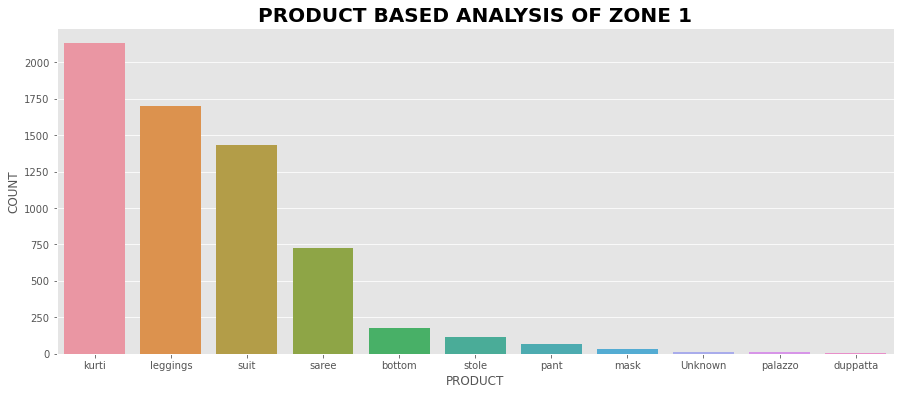

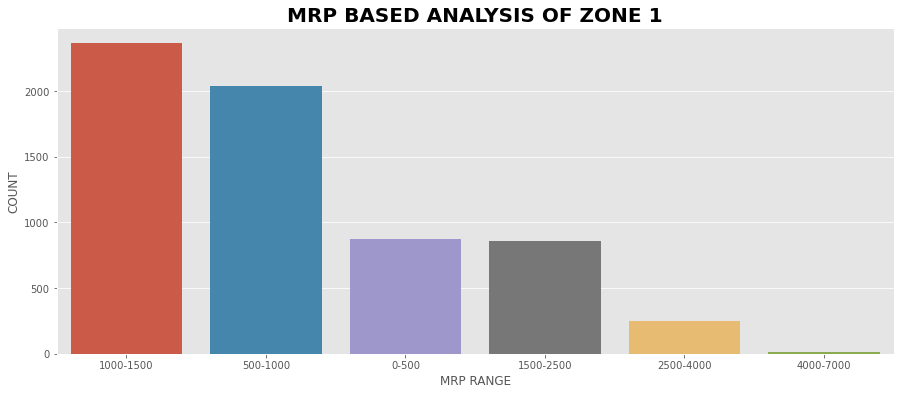

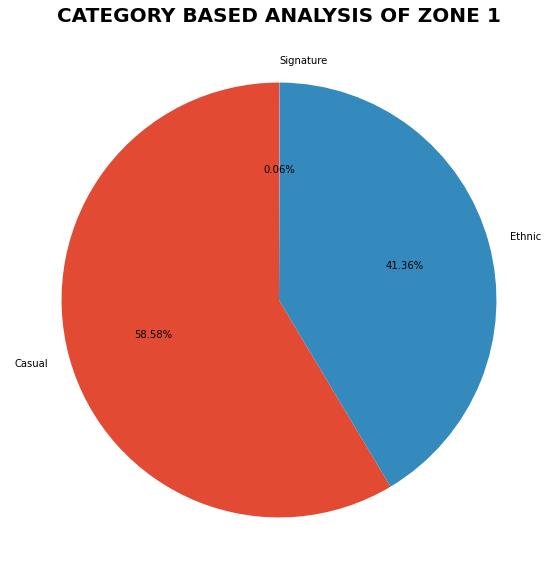

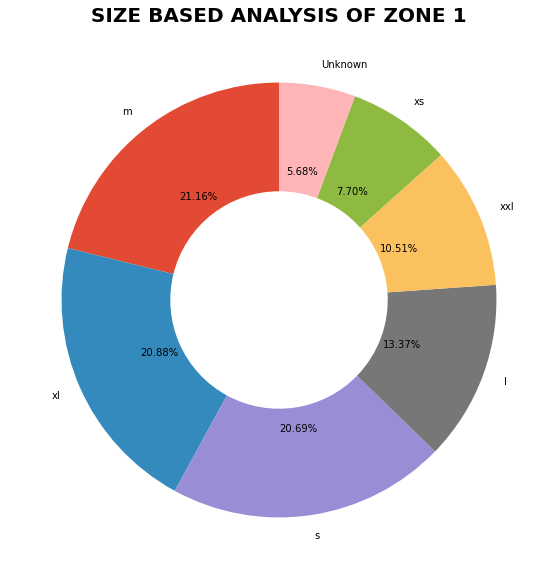

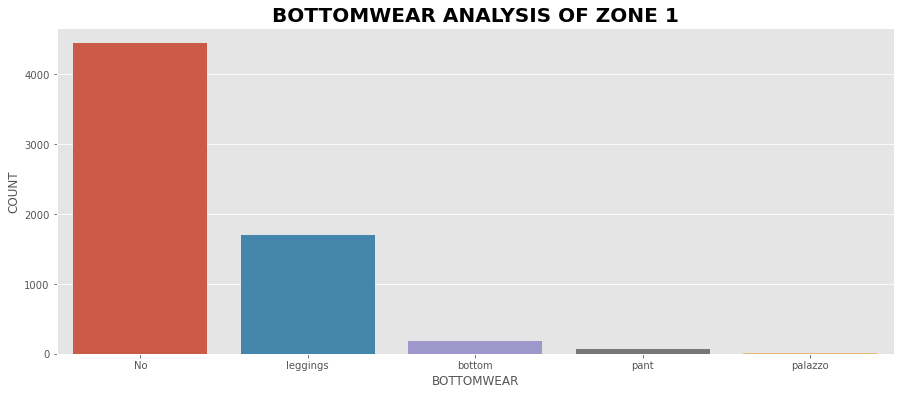

In [40]:
# Plotting the results of state 1 (Kerala)
state_wise_stat(1)

Total Sale in Zone 2 in Kerala = 4313743
Total Return Value in Zone 2 in Kerala = 144214
Total Net Sale in Zone 2 in Kerala = 4169529


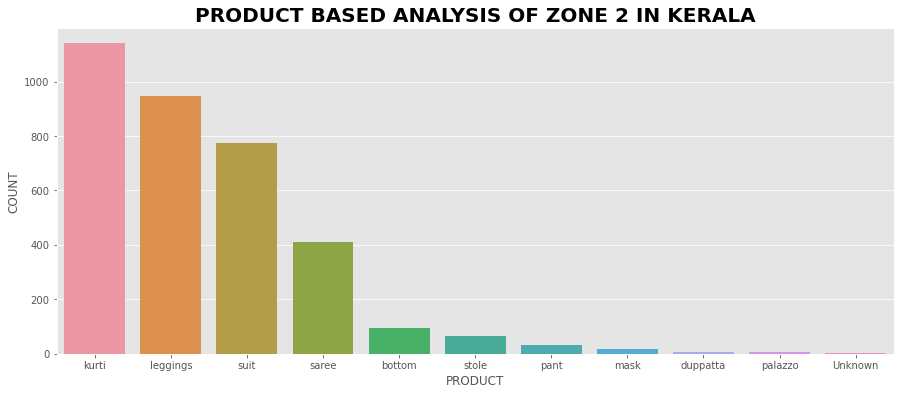

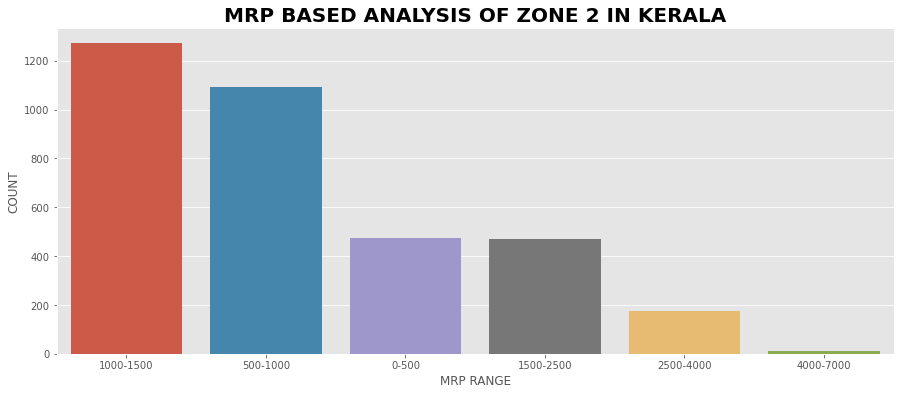

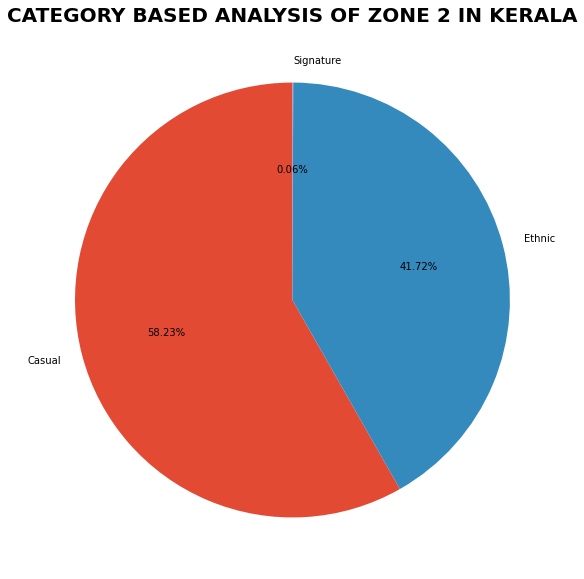

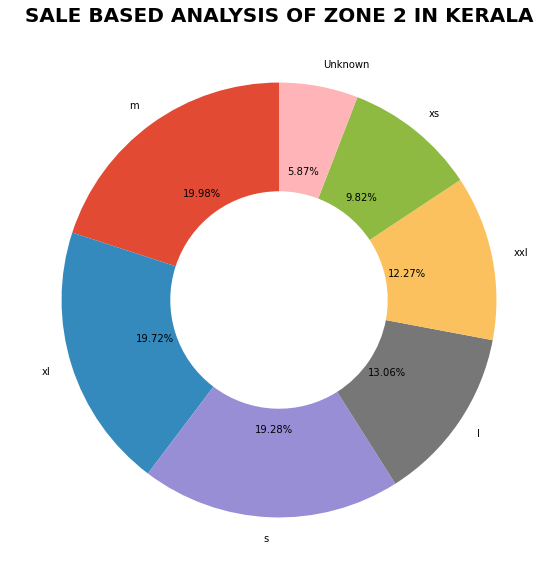

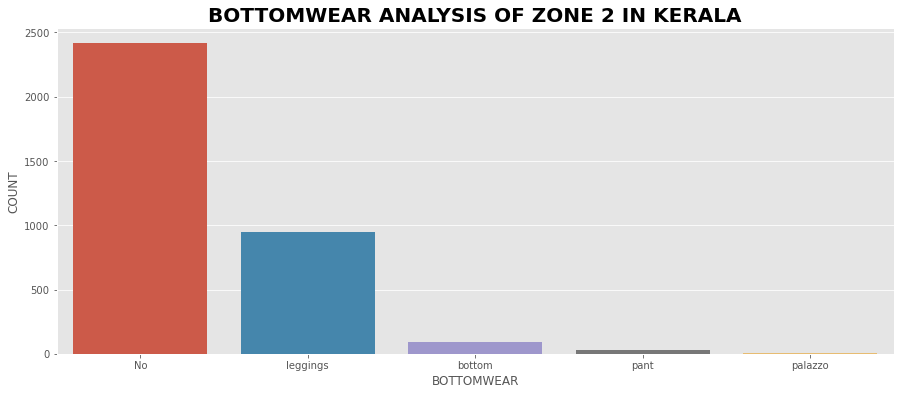

In [41]:
# Plotting the results of Zone 2 in Kerala state (Idukki, Ernakulam, Thrissur, Palakkad, Malappuram)
kerala_stat(2)

## PRODUCT PERFORMANCE

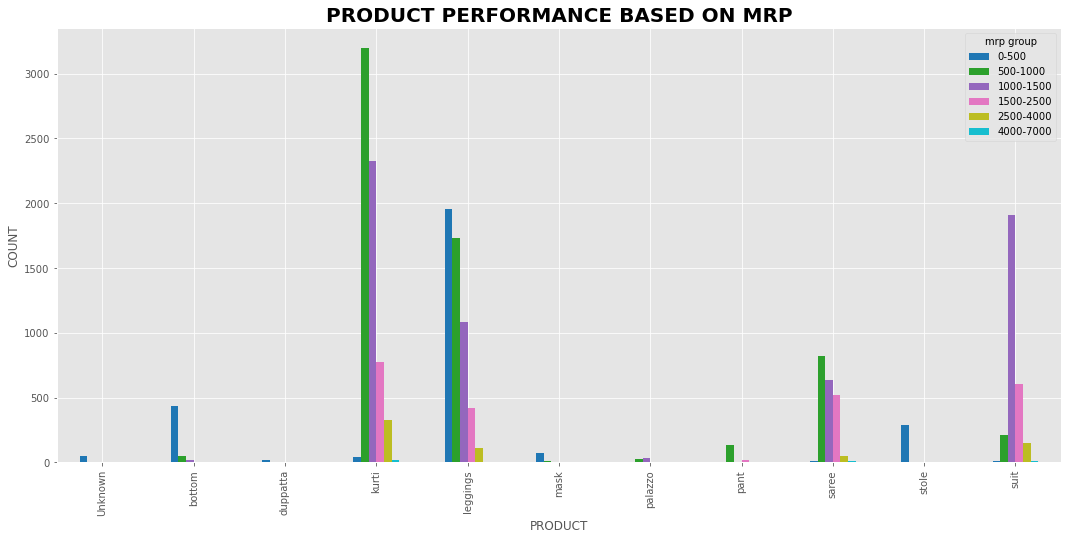

In [42]:
# Product Performance Based on MRP
pd.crosstab(df["Product"], df["mrp group"]).plot(kind = "bar",
                                                 figsize = (18,8),
                                                 cmap = "tab10")
plt.title("PRODUCT PERFORMANCE BASED ON MRP", fontsize = 20, fontweight = "bold")
plt.xlabel("PRODUCT")
plt.ylabel("COUNT");

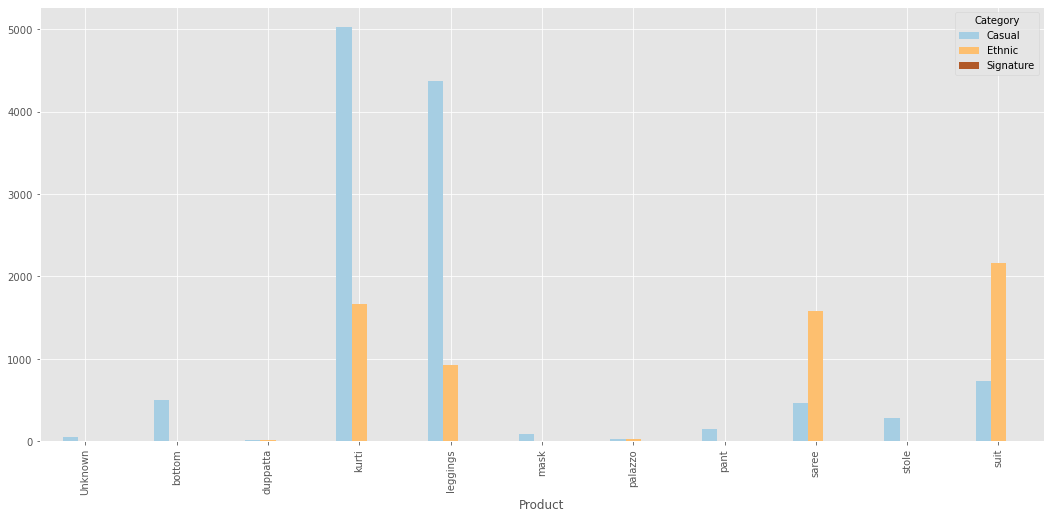

In [43]:
# Product Performance Based on Category
pd.crosstab(df["Product"], df["Category"]).plot(kind = "bar",
                                                 figsize = (18,8),
                                                 cmap = "Paired");